In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(3, 3), transparent=False, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs              NA
gseapy              0.10.4
h5py                2.10.0
idna                2.10
igraph     

In [4]:
heart_infection_sc = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc.h5ad")

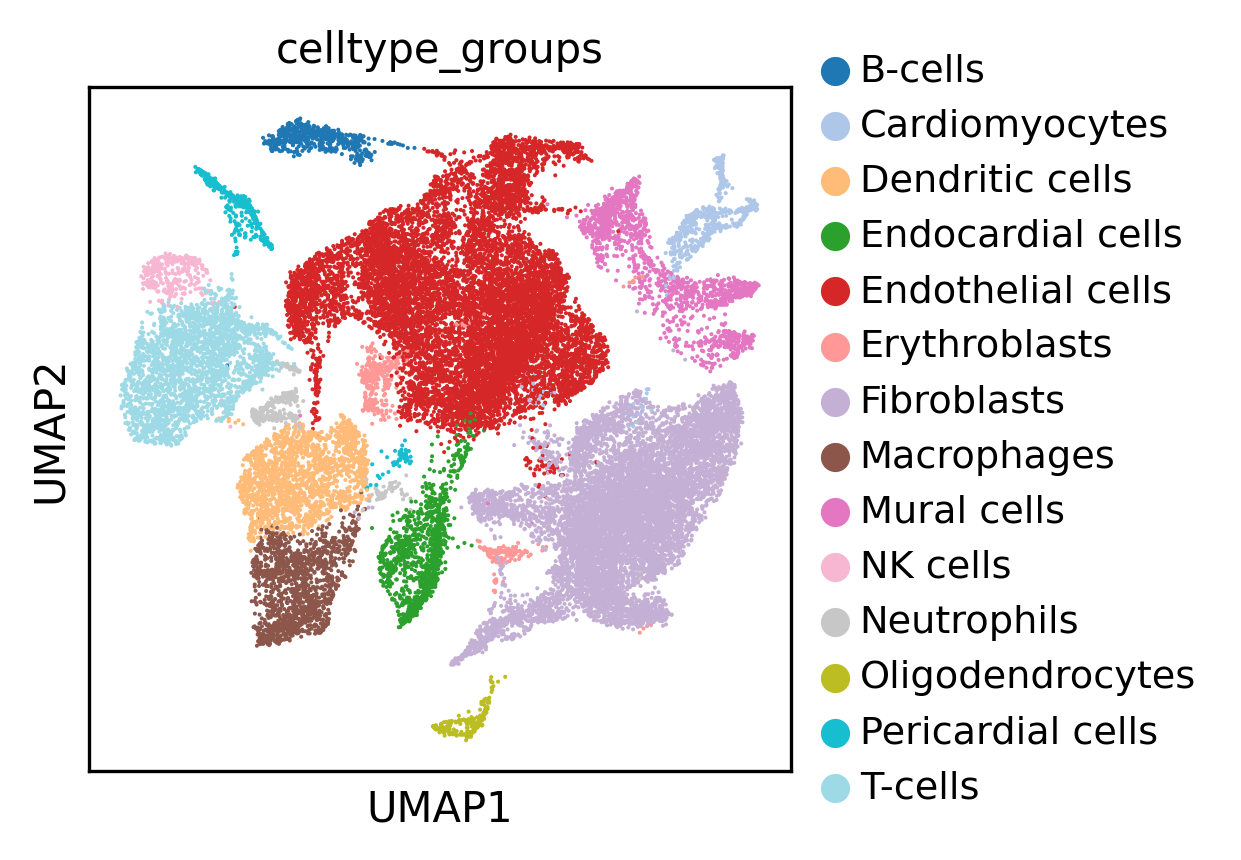

In [6]:
sc.pl.umap(heart_infection_sc, color = "celltype_groups")

In [992]:
# Mock_Heart_D4PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D7PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D10PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5')

T1L_K287T_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/filtered_feature_bc_matrix.h5')

# Mock_Heart_D4PI_xGen.var_names_make_unique()
T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
# Mock_Heart_D7PI_xGen.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
# Mock_Heart_D10PI_xGen.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()

T1L_K287T_Heart_D4PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D7PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D10PI_xGen3.var_names_make_unique()

samples_xGen3 = ["Heart_T1L-WT_D4PI", "Heart_T1L-K287T_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-K287T_D7PI", "Heart_T1L-WT_D10PI", "Heart_T1L-K287T_D10PI"]

heart_infection_sc_xGen3_subset = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_K287T_Heart_D4PI_xGen3, 
                                                    T1L_WT_Heart_D7PI_xGen3,
                                                    T1L_K287T_Heart_D7PI_xGen3, 
                                                    T1L_WT_Heart_D10PI_xGen3,
                                                    T1L_K287T_Heart_D10PI_xGen3,
                                                    batch_key= "sample", batch_categories=samples_xGen3,
                                                    index_unique="-")

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:03)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. 

In [993]:
reoviral_genes = [name for name in heart_infection_sc_xGen3_subset.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_xGen3_subset[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]

viral_expression.columns = [name + "_xGen3" for name in viral_expression.columns]

print(heart_infection_sc_4samples_no_viral_genes.obs.shape)
heart_infection_sc_4samples_no_viral_genes.obs = heart_infection_sc_4samples_no_viral_genes.obs.join(viral_expression)
print(heart_infection_sc_4samples_no_viral_genes.obs.shape)
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3'] = viral_expression.sum(axis=1).astype(int)

heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA'] = heart_infection_sc_4samples_no_viral_genes.obs['total_viral']
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'] = heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3']
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA'][heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA']==0] = np.nan
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'][heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA']==0] = np.nan
heart_infection_sc_4samples_no_viral_genes.obs['pct_viral_xGen3'] = ((heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA']) / (heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'] + heart_infection_sc_4samples_no_viral_genes.obs['total_counts'])) * 100


['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(31684, 35)
(31684, 45)


<ipython-input-993-5c8788256cf0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-993-5c8788256cf0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [994]:
print(np.sum(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"] > 0))
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"]
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"][(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"] < 2)] = np.NaN

1853


<ipython-input-994-804121508a41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-994-804121508a41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-994-804121508a41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


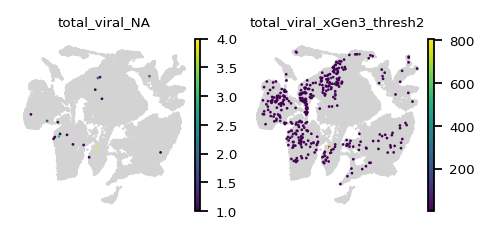

In [15]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.4,1.4), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["total_viral_NA",  "total_viral_xGen3_thresh2"], size = 6, ncols=2, palette='viridis_r', add_outline=False, frameon=False, wspace=0.2, save="viral_trop_umap_xgen_filtered.pdf")

In [1147]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")

In [52]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")
heart_infection_sc_4samples_no_viral_genes

AnnData object with n_obs × n_vars = 31684 × 2247
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups', 'T1LReoS1_xGen3', 'T1LReoS2_xGen3', 'T1LReoS3_xGen3', 'T1LReoS4_xGen3', 'T1LReoM1_xGen3', 'T1LReoM2_xGen3', 'T1LReoM3_xGen3', 'T1LReoL1_xGen3', 'T1LReoL2_xGen3', 'T1LReoL3_xGen3', 'total_viral_xGen3', 'total_viral_NA', 'total_viral_xGen3_NA', 'pct_viral_xGen3', 'total_viral_xGen3_thresh2', 'total_viral_xGen3_thresh3', 'total_viral_xGen3_thresh4', 'pct_viral_xGen3_thresh2', 'pct_viral_xGen3_thresh3', 'pct_viral_xGen3_thresh4'
    var: 'gene_i

In [53]:
infected_heart_sc = heart_infection_sc_4samples_no_viral_genes.obs[heart_infection_sc_4samples_no_viral_genes.obs["condition"].isin(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])]
infected_heart_sc["condition"] = infected_heart_sc["condition"].astype("string")

<ipython-input-53-7d551f697df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
heart_infection_sc_4samples_no_viral_genes.obs["viral_exp"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"]
mean_viral_exp = heart_infection_sc_4samples_no_viral_genes.obs[["condition", "celltype_groups", "viral_exp"]].groupby(["condition", "celltype_groups"]).mean()["viral_exp"]
celltype_counts = heart_infection_sc_4samples_no_viral_genes.obs.value_counts(subset=["condition", "celltype_groups"])
infected_cells_only = heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["viral_exp"] >= 0, :]
infected_cells_only
infected_cells_only.obs["condition"] = infected_cells_only.obs["condition"].cat.set_categories(heart_infection_sc_4samples_no_viral_genes.obs["condition"].cat.categories)
infected_cells_only.obs["celltype_groups"] = infected_cells_only.obs["celltype_groups"].cat.set_categories(heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].cat.categories)
infected_celltypes_counts = infected_cells_only.obs.value_counts(subset=["condition", "celltype_groups"])
count_data = pd.DataFrame({'mean_viral_exp': mean_viral_exp, 'total_counts': celltype_counts, 'infected_counts': infected_celltypes_counts})
count_data["pct_cells"] = round(((count_data["infected_counts"]/count_data["total_counts"]) * 100), 2)
count_data = count_data.iloc[count_data.index.get_level_values('condition').isin(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])]
celltype_counts = count_data.unstack("celltype_groups")
celltype_counts = celltype_counts.reindex(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])
celltype_counts

Trying to set attribute `.obs` of view, copying.


mean_viral_exp                                 \
celltype_groups        B-cells Cardiomyocytes Dendritic cells   
condition                                                       
T1L-WT_D4PI                NaN       6.666667        2.500000   
T1L-WT_D7PI                2.0       2.000000        8.352941   
T1L-WT_D10PI               NaN            NaN       20.000000   

                                                                               \
celltype_groups Endocardial cells Endothelial cells Erythroblasts Fibroblasts   
condition                                                                       
T1L-WT_D4PI             83.100000          6.505495           2.0    3.172414   
T1L-WT_D7PI              6.666667          2.454545           NaN    2.214286   
T1L-WT_D10PI                  NaN               NaN           NaN         NaN   

                                                  ...         pct_cells  \
celltype_groups Macrophages Mural cells NK cells  ... Endothelial cells   
condition                                         ...                     
T1L-WT_D4PI        4.454545        2.00      NaN  ...              3.78   
T1L-WT_D7PI        3.000000       12.75      2.0  ...              6.42   
T1L-WT_D10PI            NaN         NaN      NaN  ...               NaN   

                                                                            \
celltype_groups Erythroblasts Fibroblasts Macrophages Mural cells NK cells   
condition                                                                    
T1L-WT_D4PI              1.18        1.42        2.95        1.68      NaN   
T1L-WT_D7PI               NaN        2.66        4.08        4.04     3.54   
T1L-WT_D10PI              NaN         NaN         NaN         NaN      NaN   

                                                                        
celltype_groups Neutrophils Oligodendrocytes Pericardial cells T-cells  
condition                                                               
T1L-WT_D4PI             NaN              NaN               NaN    1.96  
T1L-WT_D7PI            5.63              NaN              5.88    4.32  
T1L-WT_D10PI            NaN              NaN               NaN    0.15  

[3 rows x 56 columns]

In [60]:
celltype_counts["mean_viral_exp"].to_csv("./../csvs/heart_mean_viral_exp.csv")
celltype_counts["pct_cells"].to_csv("./../csvs/heart_pct_cells.csv")

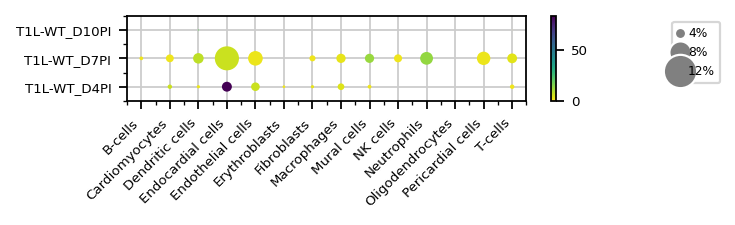

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
plt.rcParams['axes.axisbelow'] = True

N = celltype_counts["pct_cells"].shape[0]
M = celltype_counts["pct_cells"].shape[1]
ylabels = celltype_counts["pct_cells"].index
xlabels = celltype_counts["pct_cells"].columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = celltype_counts["pct_cells"].fillna(0).to_numpy()
c = celltype_counts["mean_viral_exp"].fillna(0).to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(figsize=(4.0,0.7))

R = (s/100.0)*4
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="viridis_r")
col.set_clim([0, np.max(c)])

ax.add_collection(col)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(col)

from matplotlib.lines import Line2D
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=5, markerfacecolor="grey")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="grey")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=15, markerfacecolor="grey")
plt.legend((line1,line2,line3),('4%','8%', "12%"),numpoints=1, bbox_to_anchor = (1.5,1.0))

plt.savefig("figures/viral_exp_dotplot_filtered.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [18]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()

reading ./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [20]:
heart_infection_sc_4samples = T1L_WT_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D7PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=["Heart_T1L-WT_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-WT_D10PI"],
                                                    index_unique="-")
heart_infection_sc_4samples.obs_names_make_unique()
heart_infection_sc_4samples.var_names_make_unique()
print(heart_infection_sc_4samples.shape)

(3193775, 54848)


In [21]:
reoviral_genes = [name for name in heart_infection_sc_4samples.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_4samples[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc_4samples.var_names, reoviral_genes)
heart_infection_sc_4samples_no_viral_genes = heart_infection_sc_4samples[:, ~reoviral_genes_indicator]
heart_infection_sc_4samples_no_viral_genes.var_names = [name.split("_")[1] for name in heart_infection_sc_4samples_no_viral_genes.var_names]
heart_infection_sc_4samples_no_viral_genes.obs = heart_infection_sc_4samples_no_viral_genes.obs.join(viral_expression.astype(int))
print(heart_infection_sc_4samples_no_viral_genes.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(3193775, 54838)


In [22]:
temp_dataset_no_viral_genes  = heart_infection_sc_4samples_no_viral_genes
temp_dataset_no_viral_genes.var['mt'] = temp_dataset_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [23]:
data = pd.DataFrame({"cell_barcode":temp_dataset_no_viral_genes.obs_names, "total_counts":temp_dataset_no_viral_genes.obs["total_counts"], "sample":temp_dataset_no_viral_genes.obs["sample"]})
data["Gapdh"] = temp_dataset_no_viral_genes[:,"Gapdh"].to_df()
data["Hba-a1"] = temp_dataset_no_viral_genes[:,"Hba-a1"].to_df()
data["cell_in_droplet"] = ["Viable cells" if data.loc[x, "total_counts"] > 200 else "Dead cells" for x in data["cell_barcode"]]
data["cell_in_droplet"] = ["Background" if data.loc[x, "total_counts"] < 3 else data.loc[x, "cell_in_droplet"] for x in data["cell_barcode"]]
data["total_counts"] = data["total_counts"] + 1
data["Gapdh"] = data["Gapdh"] + 1
data["Hba-a1"] = data["Hba-a1"] + 1
print(data.shape)
print(data["cell_in_droplet"].value_counts())

(3193775, 6)
Background      2889198
Dead cells       278902
Viable cells      25675
Name: cell_in_droplet, dtype: int64


In [24]:
data = data.sort_values(by="total_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

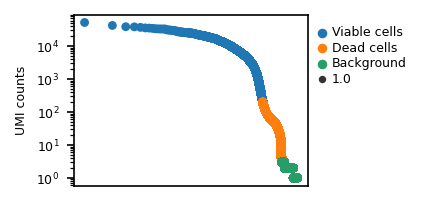

In [1038]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
plt.xlabel("Droplets")
plt.ylabel("UMI counts")
sns.scatterplot(data = data, x = "cell_number", y = "total_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(yscale = "log", xscale = "log")
ax.axes.xaxis.set_visible(False)
# ax.axes.xaxis.set_ticks([])
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("./figures/knee_totalUMI.pdf")

In [25]:
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/raw_feature_bc_matrix.h5')

T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()

heart_infection_sc_4samples_xGen3 = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_WT_Heart_D7PI_xGen3, T1L_WT_Heart_D10PI_xGen3,
                                                    batch_key= "sample", batch_categories=["Heart_T1L-WT_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-WT_D10PI"],
                                                    index_unique="-")
heart_infection_sc_4samples_xGen3.obs_names_make_unique()
heart_infection_sc_4samples_xGen3.var_names_make_unique()
print(heart_infection_sc_4samples_xGen3.shape)

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(84949, 54848)


In [26]:
reoviral_genes = [name for name in heart_infection_sc_4samples_xGen3.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_4samples_xGen3[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc_4samples_xGen3.var_names, reoviral_genes)
heart_infection_sc_4samples_xGen3 = heart_infection_sc_4samples_xGen3[:, reoviral_genes_indicator]
heart_infection_sc_4samples_xGen3.var_names = [name.split("_")[1] for name in heart_infection_sc_4samples_xGen3.var_names]
heart_infection_sc_4samples_xGen3.obs = heart_infection_sc_4samples_xGen3.obs.join(viral_expression.astype(int))
print(heart_infection_sc_4samples_xGen3.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(84949, 10)


In [27]:
temp_dataset_viral_genes  = heart_infection_sc_4samples_xGen3
temp_dataset_viral_genes.var['mt'] = temp_dataset_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [28]:
viral_data = pd.DataFrame({"cell_barcode":temp_dataset_viral_genes.obs_names, "sample":temp_dataset_viral_genes.obs["sample"], "total_viral_counts":temp_dataset_viral_genes.obs["total_counts"]})
viral_data = viral_data.sort_values(by="total_viral_counts", ascending=False)
viral_data["cell_number"] = [i+1 for i in range(viral_data.shape[0])]
viral_data["cell_number"] = np.log10(viral_data["cell_number"]+1) + 1
# viral_data = viral_data[viral_data["cell_barcode"].isin(data["cell_barcode"])]
print(viral_data.shape)
# viral_data["cell_in_droplet"] = [data.loc[x,"cell_in_droplet"] for x in viral_data.index]
# viral_data["total_counts"] = [data.loc[x,"total_counts"] for x in viral_data.index]
# viral_data["Gapdh"] = [data.loc[x,"Gapdh"] for x in viral_data.index]
# print(viral_data["cell_in_droplet"].value_counts())

data["total_viral_counts"] = [viral_data.loc[x, "total_viral_counts"] if x in viral_data.index else 0 for x in data.index]
data["total_viral_counts"] = data["total_viral_counts"] + 1

(84949, 4)


In [29]:
data = data.sort_values(by="total_viral_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1
# sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
# g = sns.FacetGrid(data, col="cell_in_droplet", hue="cell_in_droplet")
# g.map(sns.scatterplot, "cell_number", "total_viral_counts", linewidth = 0, size = 1.0).set(yscale = "log", xscale = "log")
# g.add_legend()

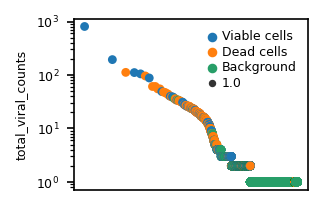

In [1044]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
plt.grid(False)
plt.xlabel("Viral UMI counts")
plt.xlabel("Droplets")
sns.scatterplot(data = data, x = "cell_number", y = "total_viral_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
ax.set(yscale = "log", xscale = "log")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.axes.xaxis.set_visible(False)
ax.axhline(1.25)
# plt.tight_layout()
plt.savefig("./figures/knee_totalviralUMI.pdf")